In [1]:
##Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train classifier.csv')
train.head()

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0

In [3]:
test=pd.read_csv('test classifier.csv')
test.head()

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

# Missing Value Analysis of Dataset

In [60]:
print(f"Data has {train.shape[0]} rows and{train.shape[1]} columns")

Data has 159571 rows and11 columns


In [61]:
train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe', 'length', 'clean_length', 'bad'],
      dtype='object')

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159571 entries, 0 to 159570
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
 8   length            159571 non-null  int64 
 9   clean_length      159571 non-null  int64 
 10  bad               159571 non-null  int32 
dtypes: int32(1), int64(8), object(2)
memory usage: 14.0+ MB


# EDA for Dataset

In [64]:
numCol=[]
catCol=[]

for col in train.columns:
    if train[col].dtype=='O':
        catCol.append(col)
    else:
            numCol.append(col)

In [66]:
print("List of numerical columns:",numCol)
print("List of categorical columns:",catCol)

List of numerical columns: ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe', 'length', 'clean_length', 'bad']
List of categorical columns: ['id', 'comment_text']


In [67]:
train.isna().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
length              0
clean_length        0
bad                 0
dtype: int64

In [69]:
train.isna().sum()/train.shape[0]*100

id                  0.0
comment_text        0.0
malignant           0.0
highly_malignant    0.0
rude                0.0
threat              0.0
abuse               0.0
loathe              0.0
length              0.0
clean_length        0.0
bad                 0.0
dtype: float64

In [70]:
train[train.isna().sum(axis=1)>1]

Empty DataFrame
Columns: [id, comment_text, malignant, highly_malignant, rude, threat, abuse, loathe, length, clean_length, bad]
Index: []

In [71]:
train[train.duplicated()]

id  \
4130                                                numbr   
7732                                                numbr   
8459                          numbrjulynumbrnumbrnumbrutc   
10126                          numbrnumbrnumbrjunnumbrutc   
10994                                               numbr   
...                                                   ...   
158407                         numbrnumbrnumbraprnumbrutc   
158438                                              numbr   
158527  welcomehellowelcomewikipediathankcontributions...   
158770                    usertalknumbrnumbrcontributions   
158779  ipaddressblockedbelievedopenproxyzombiecompute...   

                                             comment_text  malignant  \
4130                                                numbr          0   
7732                                                numbr          0   
8459                   numbr july numbr numbr:numbr (utc)          0   
10126                  numbr:numbr, numbr jun numbr (utc)          0   
10994                                               numbr          0   
...                                                   ...        ...   
158407                 numbr:numbr, numbr apr numbr (utc)          0   
158438                                              numbr          0   
158527  welcome! hello, welcome wikipedia! thank contr...          0   
158770              user talk:numbr.numbr (contributions)          0   
158779  ip address blocked believed open proxy zombie ...          0   

        highly_malignant  rude  threat  abuse  loathe  length  clean_length  \
4130                   0     0       0      0       0      16             5   
7732                   0     0       0      0       0      16             5   
8459                   0     0       0      0       0      23            34   
10126                  0     0       0      0       0      24            34   
10994                  0     0       0      0       0      16             5   
...                  ...   ...     ...    ...     ...     ...           ...   
158407                 0     0       0      0       0      23            34   
158438                 0     0       0      0       0      16             5   
158527                 0     0       0      0       0     633           428   
158770                 0     0       0      0       0      42            37   
158779                 0     0       0      0       0     372           252   

        bad  
4130      0  
7732      0  
8459      0  
10126     0  
10994     0  
...     ...  
158407    0  
158438    0  
158527    0  
158770    0  
158779    0  

[233 rows x 11 columns]

In [72]:
train.describe(include="all")

id comment_text      malignant  highly_malignant           rude  \
count   159571       159571  159571.000000     159571.000000  159571.000000   
unique  157892       158831            NaN               NaN            NaN   
top                   numbr            NaN               NaN            NaN   
freq       208           54            NaN               NaN            NaN   
mean       NaN          NaN       0.095844          0.009996       0.052948   
std        NaN          NaN       0.294379          0.099477       0.223931   
min        NaN          NaN       0.000000          0.000000       0.000000   
25%        NaN          NaN       0.000000          0.000000       0.000000   
50%        NaN          NaN       0.000000          0.000000       0.000000   
75%        NaN          NaN       0.000000          0.000000       0.000000   
max        NaN          NaN       1.000000          1.000000       1.000000   

               threat          abuse         loathe         length  \
count   159571.000000  159571.000000  159571.000000  159571.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         0.002996       0.049364       0.008805     394.138847   
std          0.054650       0.216627       0.093420     590.725381   
min          0.000000       0.000000       0.000000       5.000000   
25%          0.000000       0.000000       0.000000      96.000000   
50%          0.000000       0.000000       0.000000     205.000000   
75%          0.000000       0.000000       0.000000     436.000000   
max          1.000000       1.000000       1.000000    5000.000000   

         clean_length            bad  
count   159571.000000  159571.000000  
unique            NaN            NaN  
top               NaN            NaN  
freq              NaN            NaN  
mean       273.077107       0.101679  
std        424.238689       0.302226  
min          3.000000       0.000000  
25%         66.000000       0.000000  
50%        141.000000       0.000000  
75%        297.000000       0.000000  
max       5000.000000       1.000000

In [73]:
train[numCol].describe()

malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe         length   clean_length  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mean        0.049364       0.008805     394.138847     273.077107   
std         0.216627       0.093420     590.725381     424.238689   
min         0.000000       0.000000       5.000000       3.000000   
25%         0.000000       0.000000      96.000000      66.000000   
50%         0.000000       0.000000     205.000000     141.000000   
75%         0.000000       0.000000     436.000000     297.000000   
max         1.000000       1.000000    5000.000000    5000.000000   

                 bad  
count  159571.000000  
mean        0.101679  
std         0.302226  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [74]:
for i in numCol:
    print(i)
    print(train[i].nunique())
    print(train[i].value_counts())
    print("\n")

malignant
2
0    144277
1     15294
Name: malignant, dtype: int64


highly_malignant
2
0    157976
1      1595
Name: highly_malignant, dtype: int64


rude
2
0    151122
1      8449
Name: rude, dtype: int64


threat
2
0    159093
1       478
Name: threat, dtype: int64


abuse
2
0    151694
1      7877
Name: abuse, dtype: int64


loathe
2
0    158166
1      1405
Name: loathe, dtype: int64


length
4048
24      629
34      628
32      617
31      615
33      609
       ... 
2539      1
4712      1
3269      1
3419      1
4585      1
Name: length, Length: 4048, dtype: int64


clean_length
3286
34      891
39      868
37      837
40      831
33      816
       ... 
2399      1
2857      1
2655      1
4828      1
2047      1
Name: clean_length, Length: 3286, dtype: int64


bad
2
0    143346
1     16225
Name: bad, dtype: int64




C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


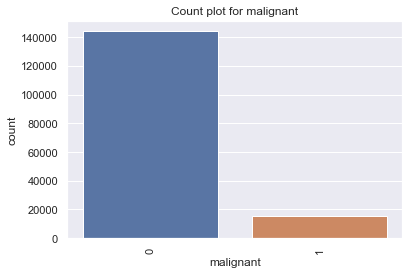

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


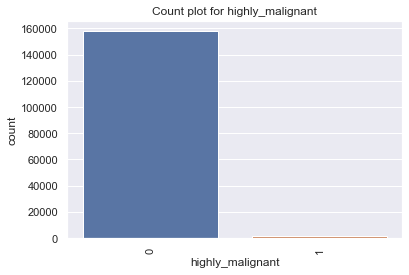

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


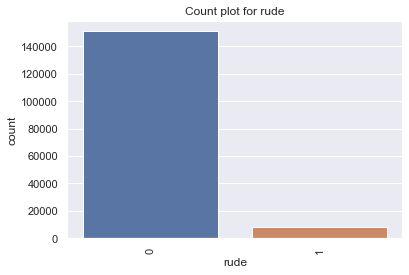

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


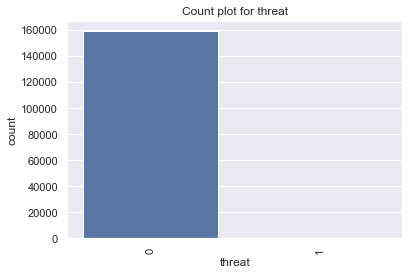

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


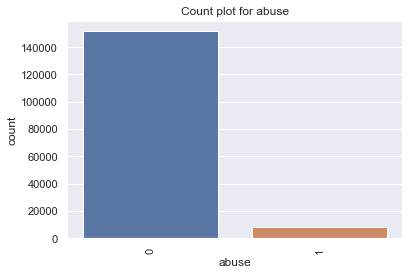

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


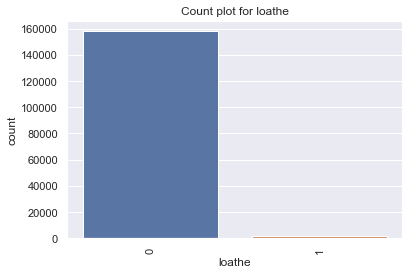

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


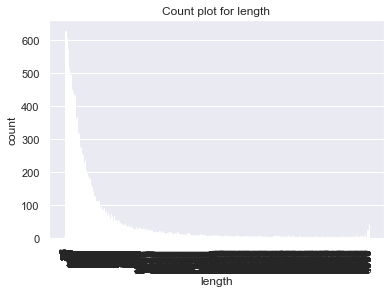

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


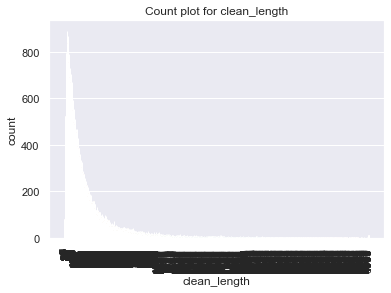

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


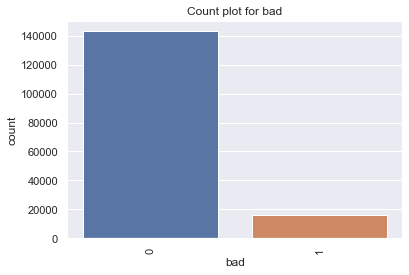

In [76]:
for i in numCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.countplot(train[i])
    plt.xticks(rotation=90)
    plt.title(f"Count plot for {i}")
    plt.plot()
    plt.show()

<Figure size 432x288 with 0 Axes>

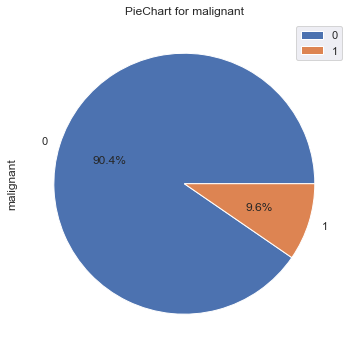

<Figure size 432x288 with 0 Axes>

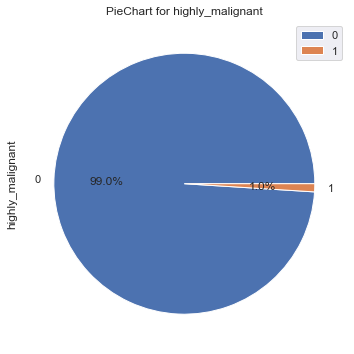

<Figure size 432x288 with 0 Axes>

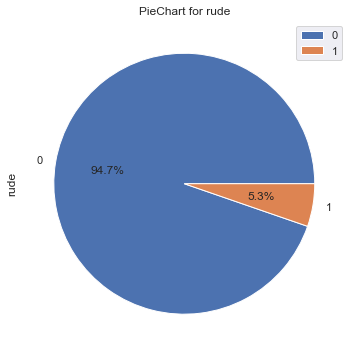

<Figure size 432x288 with 0 Axes>

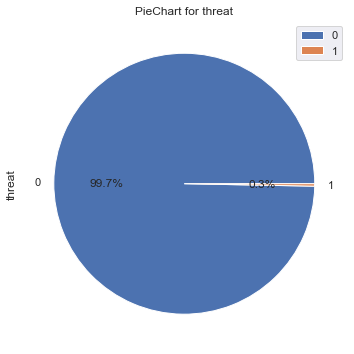

<Figure size 432x288 with 0 Axes>

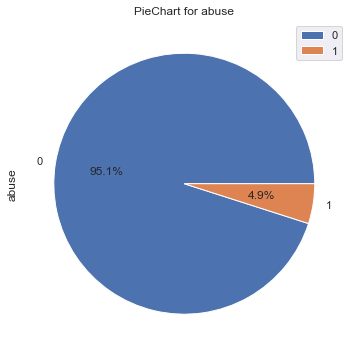

<Figure size 432x288 with 0 Axes>

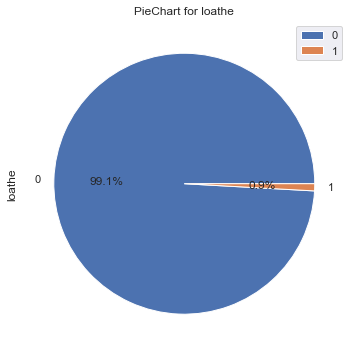

<Figure size 432x288 with 0 Axes>

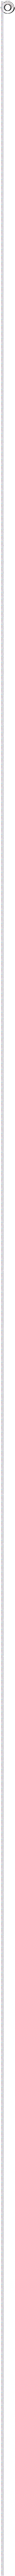

<Figure size 432x288 with 0 Axes>

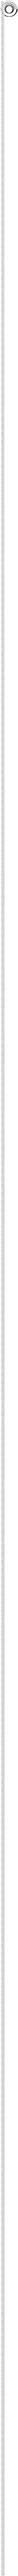

<Figure size 432x288 with 0 Axes>

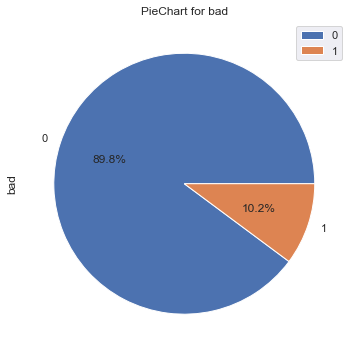

In [80]:
for i in numCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    countstrain= pd.DataFrame(train[i].value_counts())
    plot= countstrain.plot.pie(subplots=True,autopct="%.1f%%",figsize=(11,6))
    plt.title(f"PieChart for {i}")
    plt.plot()
    plt.show()

malignant


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

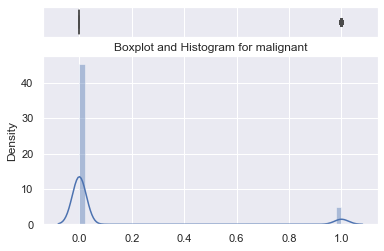

highly_malignant


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

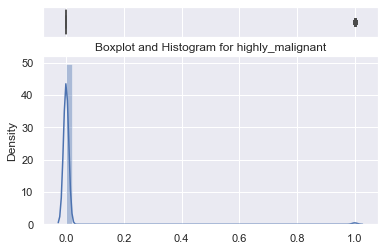

rude


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

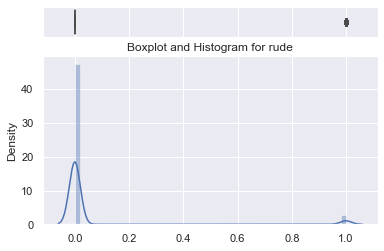

threat


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

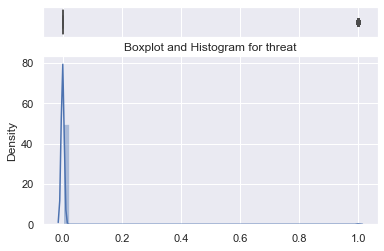

abuse


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

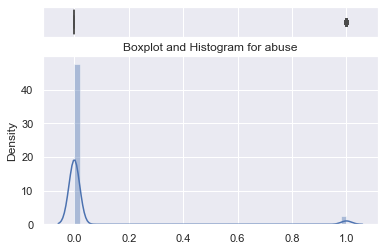

loathe


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

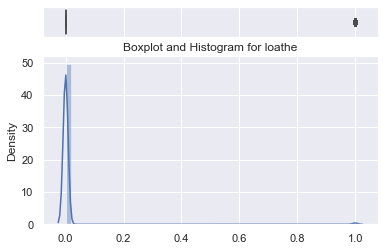

length


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

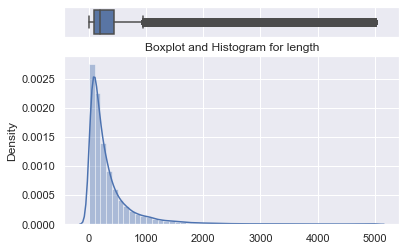

clean_length


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

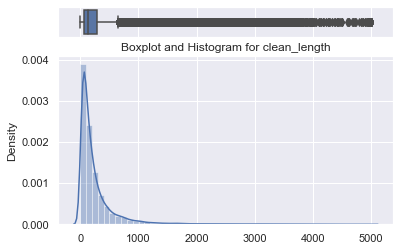

bad


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

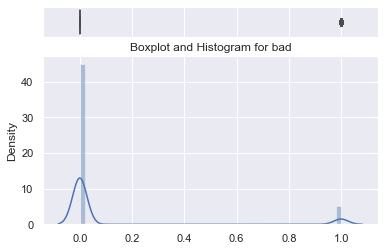

In [82]:
for i in numCol:
    print(i)
    plt.figure()
    sns.set_theme(style="darkgrid")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
    sns.boxplot(x = train[i],ax=ax_box)
    #sns.histplot (data=df, x=i, ax=ax_hist)
    sns.distplot(x= train[i],ax=ax_hist)
    ax_box.set(xlabel='')
    plt.plot()
    plt.title(f"Boxplot and Histogram for {i}")
    plt.show()

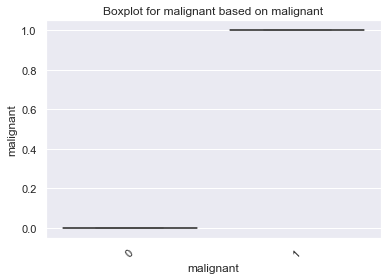

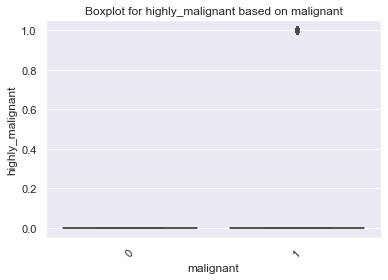

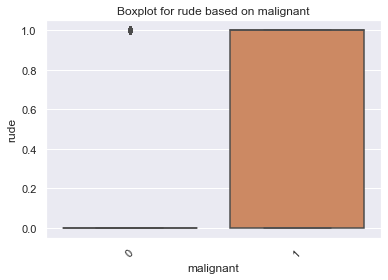

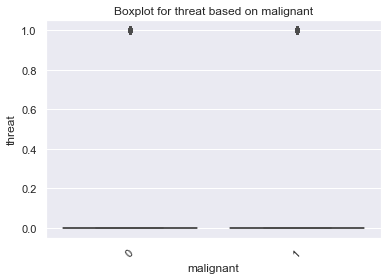

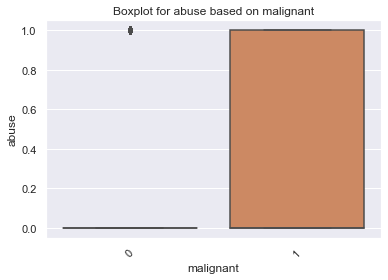

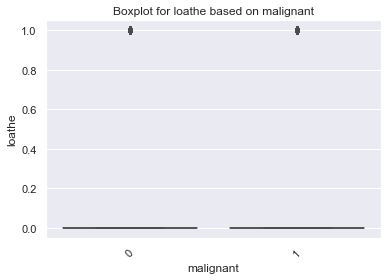

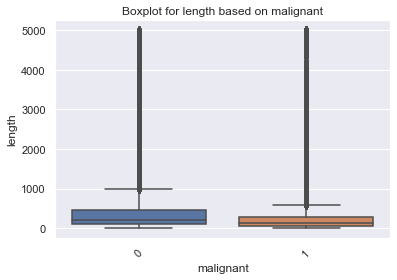

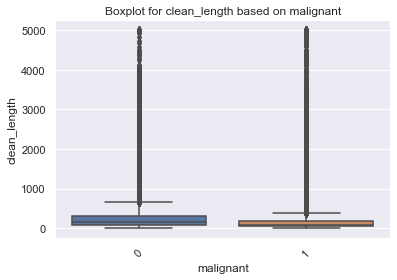

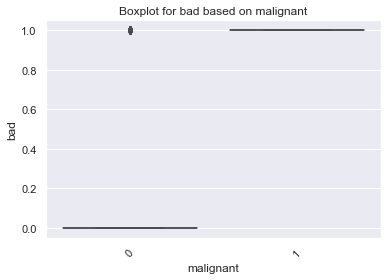

In [84]:
#Bivariate Analysis
for i in numCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.boxplot(x='malignant',y=i,data=train)
    plt.xticks(rotation=45)
    plt.plot()
    plt.title(f"Boxplot for {i} based on malignant")
    plt.show()

# Multivariate Analysis

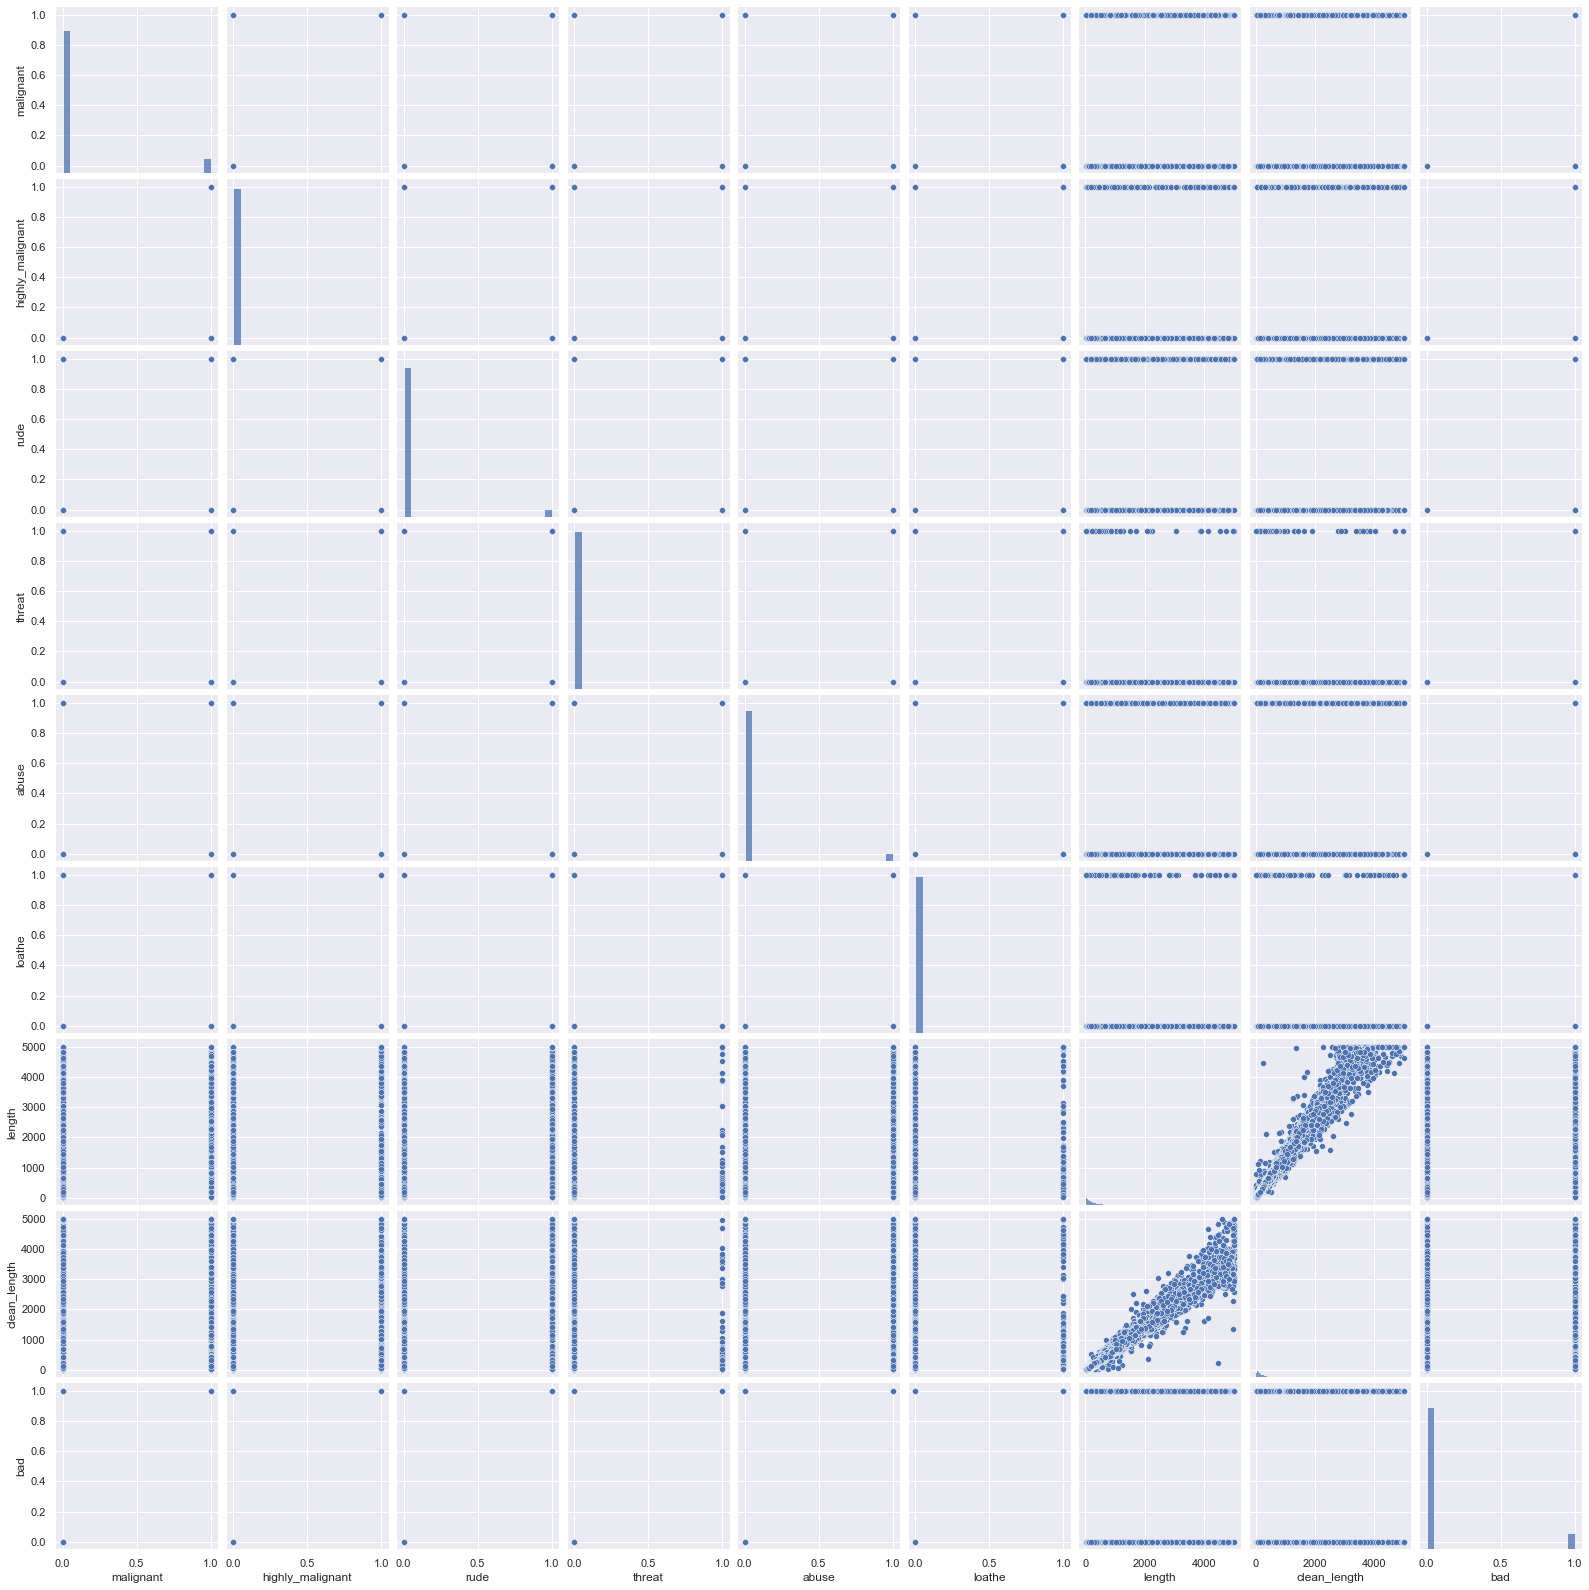

In [85]:
sns.pairplot(train)
plt.plot()
plt.show()

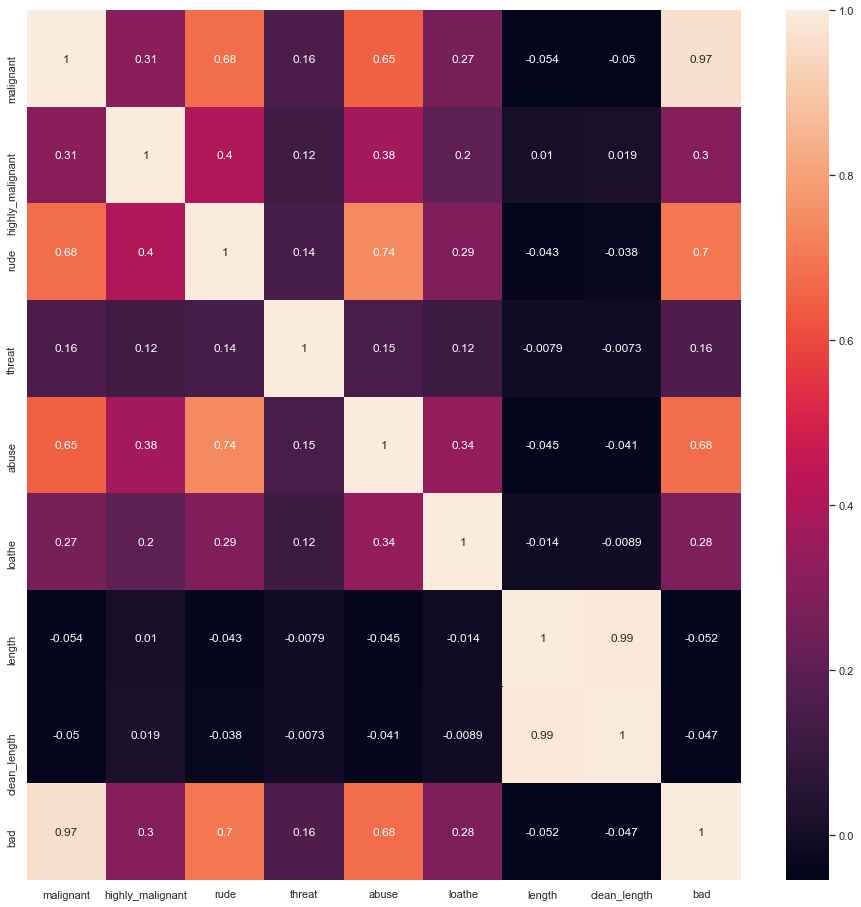

In [86]:
plt.figure(figsize= (16,16))
sns.heatmap(train.corr(),annot=True)
plt.show()

# Outlier Analysis

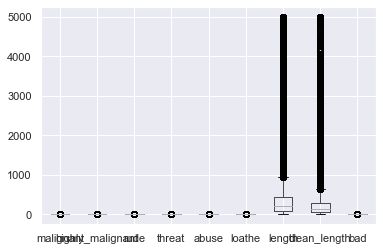

In [87]:
train.boxplot();

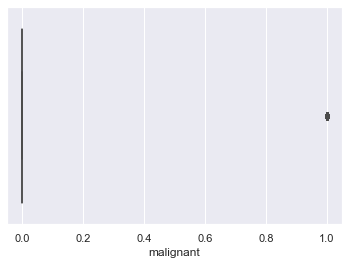

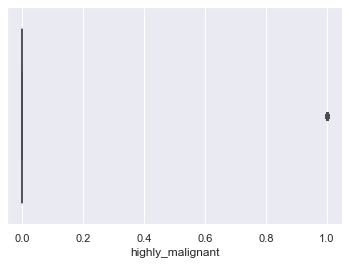

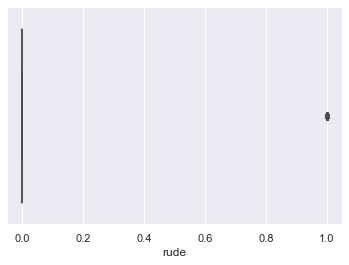

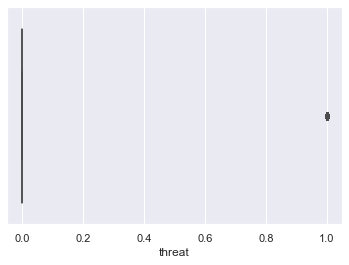

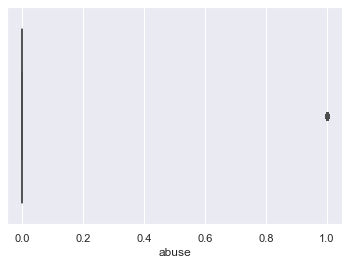

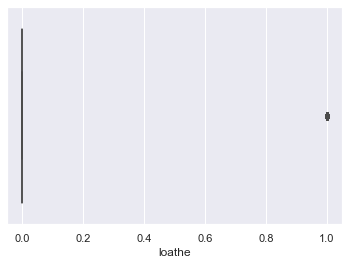

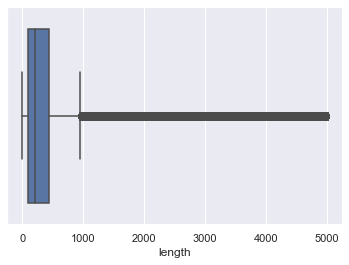

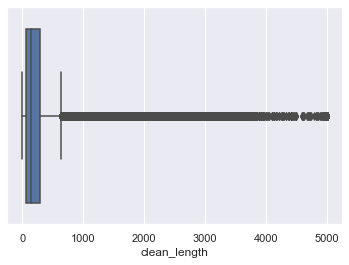

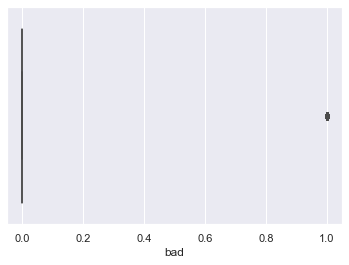

In [88]:
for i in numCol:
    plt.figure()
    sns.boxplot(x=train[i])

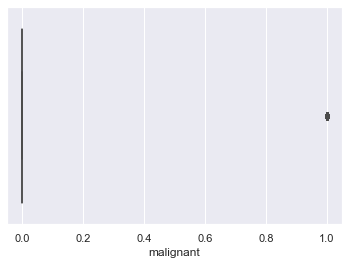

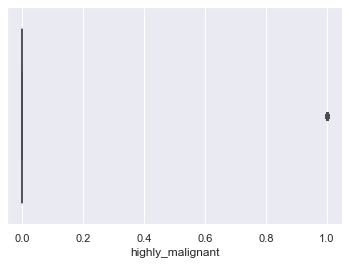

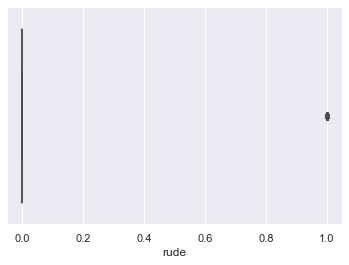

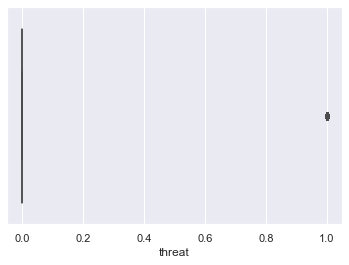

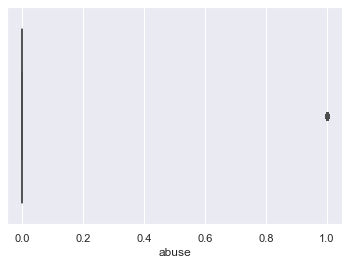

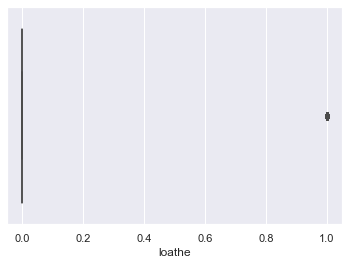

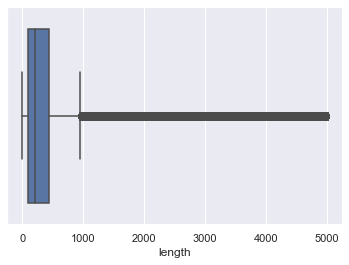

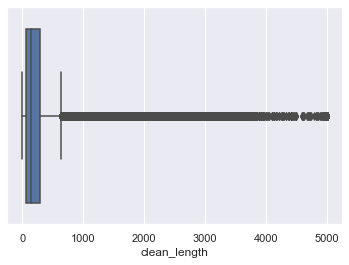

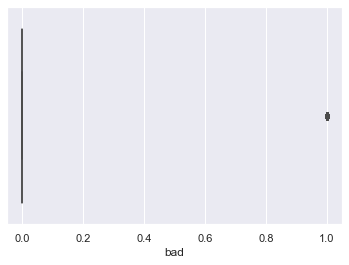

In [90]:
for i in numCol:
    plt.figure()
    sns.boxplot(x=train[i])

In [92]:
outNum =[]
for i in numCol:
    q1= train[i].quantile(0.25)
    q3= train[i].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    outNum.append([i,q1,q3,iqr,lower_limit,upper_limit])
    
    train[i] = np.where(train[i]> upper_limit,upper_limit,
                 np.where(train[i]< lower_limit,lower_limit,
                         train[i]))

In [93]:
pd.DataFrame(outNum,columns=["variableName","Q1","Q3","IQR","lowe_limit","upper_limit"])

variableName    Q1     Q3    IQR  lowe_limit  upper_limit
0         malignant   0.0    0.0    0.0         0.0          0.0
1  highly_malignant   0.0    0.0    0.0         0.0          0.0
2              rude   0.0    0.0    0.0         0.0          0.0
3            threat   0.0    0.0    0.0         0.0          0.0
4             abuse   0.0    0.0    0.0         0.0          0.0
5            loathe   0.0    0.0    0.0         0.0          0.0
6            length  96.0  436.0  340.0      -414.0        946.0
7      clean_length  66.0  297.0  231.0      -280.5        643.5
8               bad   0.0    0.0    0.0         0.0          0.0

<AxesSubplot:>

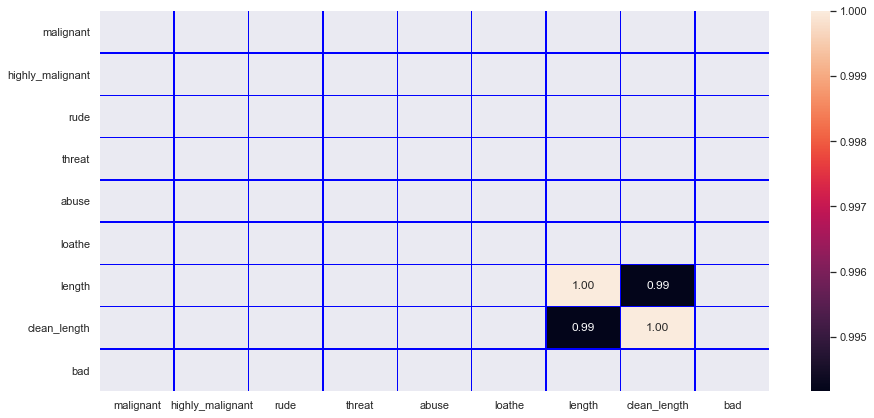

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(), annot=True, linewidths=0.5,linecolor="blue", fmt='.2f')

In [96]:
train.describe()

malignant  highly_malignant      rude    threat     abuse    loathe  \
count   159571.0          159571.0  159571.0  159571.0  159571.0  159571.0   
mean         0.0               0.0       0.0       0.0       0.0       0.0   
std          0.0               0.0       0.0       0.0       0.0       0.0   
min          0.0               0.0       0.0       0.0       0.0       0.0   
25%          0.0               0.0       0.0       0.0       0.0       0.0   
50%          0.0               0.0       0.0       0.0       0.0       0.0   
75%          0.0               0.0       0.0       0.0       0.0       0.0   
max          0.0               0.0       0.0       0.0       0.0       0.0   

              length   clean_length       bad  
count  159571.000000  159571.000000  159571.0  
mean      312.013016     213.099558       0.0  
std       283.652955     193.045670       0.0  
min         5.000000       3.000000       0.0  
25%        96.000000      66.000000       0.0  
50%       205.000000     141.000000       0.0  
75%       436.000000     297.000000       0.0  
max       946.000000     643.500000       0.0

In [97]:
train.skew()

malignant           0.000000
highly_malignant    0.000000
rude                0.000000
threat              0.000000
abuse               0.000000
loathe              0.000000
length              1.136448
clean_length        1.136955
bad                 0.000000
dtype: float64

# Multicollinearity

In [98]:
train=pd.read_csv("train Classifier.csv")
train.head()

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0

In [99]:
train.shape

(159571, 8)

In [100]:
train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [101]:
train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [102]:
num=['int64','float64']
num_vars=list(train.select_dtypes(include=num))

In [103]:
num_vars

['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

In [104]:
train=train[num_vars]

In [105]:
train.shape

(159571, 6)

In [106]:
train.isna().sum()

malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [107]:
train.dropna(inplace=True)

In [108]:
x=train.iloc[:,1:5]
y=train.iloc[:,-1]

In [109]:
x.head()

highly_malignant  rude  threat  abuse
0                 0     0       0      0
1                 0     0       0      0
2                 0     0       0      0
3                 0     0       0      0
4                 0     0       0      0

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [112]:
corrmatrix=x_train.corr()

In [113]:
corrmatrix

highly_malignant      rude    threat     abuse
highly_malignant          1.000000  0.403272  0.118656  0.375180
rude                      0.403272  1.000000  0.142734  0.741735
threat                    0.118656  0.142734  1.000000  0.151323
abuse                     0.375180  0.741735  0.151323  1.000000

<AxesSubplot:>

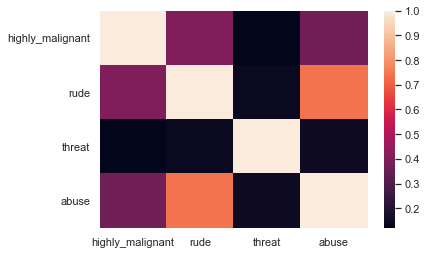

In [114]:
sns.heatmap(corrmatrix)

In [117]:
def correlation(train,threshold):
    correlated_cols=set()
    corr_matrix=train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [118]:
correlation(x_train, 0.7)

{'abuse'}

In [119]:
corr_feature=correlation(x_train,0.6)

In [120]:
corr_feature

{'abuse'}

In [121]:
x_train.shape,x_test.shape

((111699, 4), (47872, 4))

In [122]:
x_train.drop(labels=corr_feature,axis=1,inplace=True)
x_test.drop(labels=corr_feature,axis=1,inplace=True)

In [38]:
train.shape

(159571, 11)

In [39]:
train['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

# Data Cleaning
checking for duplicates and dropping them

In [40]:
train.duplicated().sum()

0

In [41]:
#dropping duplicate rows
train.drop_duplicates(inplace=True)

In [42]:
train.duplicated().sum()

0

In [44]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
length              0
clean_length        0
bad                 0
dtype: int64

In [46]:
train.isnull().sum()*100/train.shape[0]

id                  0.0
comment_text        0.0
malignant           0.0
highly_malignant    0.0
rude                0.0
threat              0.0
abuse               0.0
loathe              0.0
length              0.0
clean_length        0.0
bad                 0.0
dtype: float64

In [47]:
train['comment_text'].fillna('',inplace=True)
train['malignant'].fillna('',inplace=True)
train['highly_malignant'].fillna('missing',inplace=True)

In [48]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
length              0
clean_length        0
bad                 0
dtype: int64

# Data Preprocessing

In [49]:
import re
def decontracted(phrase):
    #specific
    phrase=re.sub(r" "," ",phrase)
    phrase=re.sub(r" "," ",phrase)
    phrase=re.sub(r" "," ",phrase)
    phrase=re.sub(r"won't","will not",phrase)
    phrase=re.sub(r"can\'t","can not",phrase)
    #general
    phrase=re.sub(r"n\'t","not",phrase)
    phrase=re.sub(r"\'re","are",phrase)
    phrase=re.sub(r"\'s","s",phrase)
    phrase=re.sub(r"\'d","would",phrase)
    phrase=re.sub(r"\'ll","will",phrase)
    phrase=re.sub(r"\'t","not",phrase)
    phrase=re.sub(r"\'ve","have",phrase)
    phrase=re.sub(r"\'m","am",phrase)
    return phrase

In [50]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [51]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
stop_words=stopwords.words('english')

In [54]:
lemmatizer=WordNetLemmatizer()

In [56]:
from tqdm import tqdm
preprocessed_comment_text=[]
#tqdm is for printing the status bar
for sentance in tqdm(train['comment_text'].values):
    sent=decontracted(sentance)
    sent=re.sub(r'https?:\/\/.*[\r\n]*','',sent)
    sent=re.sub('[^A-Za-z]+','',sent)
    sent=' '.join(e for e in sent.split() if e not in stop_words)
    sent=' '.join(lemmatizer.lemmatize(e) for e in sent.split())
    preprocessed_comment_text.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 159571/159571 [00:14<00:00, 10639.37it/s]


# id

In [57]:
from tqdm import tqdm
preprocessed_id=[]
#tqdm is for printing the status bar
for sentance in tqdm(train['comment_text'].values):
    sent=decontracted(sentance)
    sent=re.sub(r'https?:\/\/.*[\r\n]*','',sent)
    sent=re.sub('[^A-Za-z]+','',sent)
    sent=' '.join(e for e in sent.split() if e not in stop_words)
    sent=' '.join(lemmatizer.lemmatize(e) for e in sent.split())
    preprocessed_id.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 159571/159571 [00:15<00:00, 10472.44it/s]


In [58]:
train['id']=preprocessed_id

# Checking for missing values

In [8]:
# checking the skewness for the features:
train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant


0    144277
1     15294
Name: malignant, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


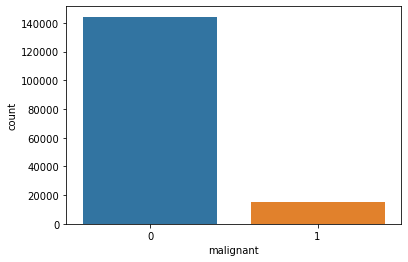

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


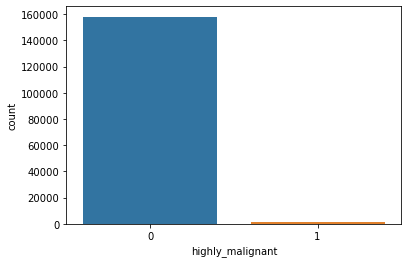

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


loathe


0    158166
1      1405
Name: loathe, dtype: int64


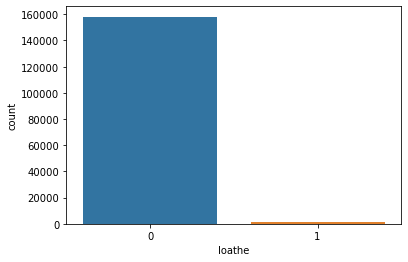

rude


0    151122
1      8449
Name: rude, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


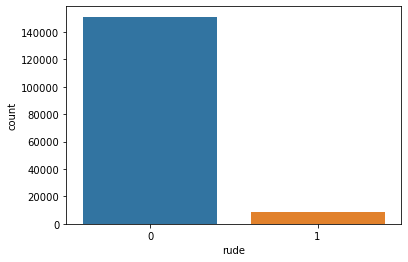

abuse


0    151694
1      7877
Name: abuse, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


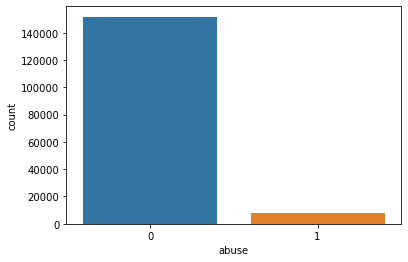

threat


0    159093
1       478
Name: threat, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


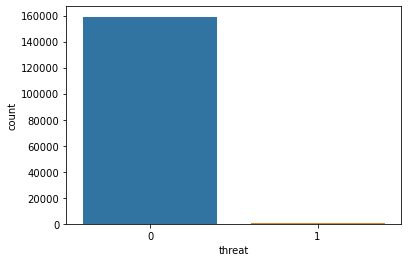

In [9]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(train[i].value_counts())
    sns.countplot(train[i])
    plt.show()

In [10]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [11]:
train['length'] = train['comment_text'].str.len()
train.head(2)

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   

   malignant  highly_malignant  rude  threat  abuse  loathe  length  
0          0                 0     0       0      0       0     264  
1          0                 0     0       0      0       0     112

In [12]:
# Convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()

# Replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
# Replace numbers with 'numbr'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

<ipython-input-12-79cf33346749>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
<ipython-input-12-79cf33346749>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
<ipython-input-12-79cf33346749>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
<ipython-input-12-79cf33346749>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
<ipython-input-12-79cf33346749>:19: FutureWarning: The default value of regex will change from 

In [13]:
train['clean_length'] = train.comment_text.str.len()
train.head()

id                                       comment_text  \
0  0000997932d777bf  explanation edits made username hardcore metal...   
1  000103f0d9cfb60f  d'aww! match background colour i'm seemingly s...   
2  000113f07ec002fd  hey man, i'm really trying edit war. guy const...   
3  0001b41b1c6bb37e  can't make real suggestion improvement wondere...   
4  0001d958c54c6e35    you, sir, hero. chance remember page that's on?   

   malignant  highly_malignant  rude  threat  abuse  loathe  length  \
0          0                 0     0       0      0       0     264   
1          0                 0     0       0      0       0     112   
2          0                 0     0       0      0       0     233   
3          0                 0     0       0      0       0     622   
4          0                 0     0       0      0       0      67   

   clean_length  
0           180  
1           111  
2           149  
3           397  
4            47

In [14]:
# Total length removal
print ('Origian Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Origian Length 62893130
Clean Length 43575187


In [15]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

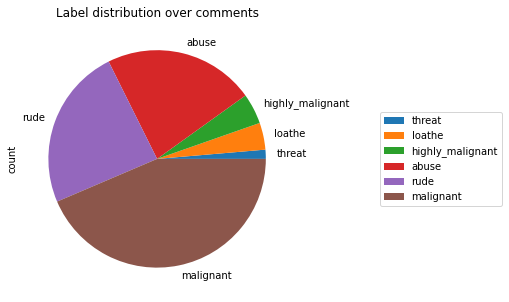

In [17]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [18]:
target_data = train[cols_target]

train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


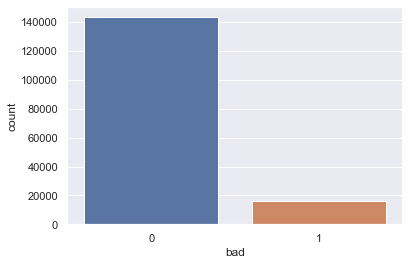

In [19]:
sns.set()
sns.countplot(x="bad" , data = train)
plt.show()

In [20]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

In [21]:
train.shape

(159571, 11)

In [22]:
test.shape

(153164, 2)

In [23]:
y=train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [24]:
y_train.shape,y_test.shape

((111699,), (47872,))

In [25]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9595609629450577
Test accuracy is 0.9552974598930482
[[42729   221]
 [ 1919  3003]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



In [26]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988898736783678
Test accuracy is 0.9389204545454546
[[41588  1362]
 [ 1562  3360]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.71      0.68      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



In [27]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988809210467416
Test accuracy is 0.9551303475935828
[[42416   534]
 [ 1614  3308]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.67      0.75      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.83      0.87     47872
weighted avg       0.95      0.96      0.95     47872



In [28]:
# xgboost
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9614052050600274
Test accuracy is 0.9526236631016043
[[42689   261]
 [ 2007  2915]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     42950
           1       0.92      0.59      0.72      4922

    accuracy                           0.95     47872
   macro avg       0.94      0.79      0.85     47872
weighted avg       0.95      0.95      0.95     47872



In [29]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.951118631321677
Test accuracy is 0.9490307486631016
[[42553   397]
 [ 2043  2879]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.88      0.58      0.70      4922

    accuracy                           0.95     47872
   macro avg       0.92      0.79      0.84     47872
weighted avg       0.95      0.95      0.94     47872



In [30]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.922300110117369
Test accuracy is 0.9173629679144385
[[42809   141]
 [ 3815  1107]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42950
           1       0.89      0.22      0.36      4922

    accuracy                           0.92     47872
   macro avg       0.90      0.61      0.66     47872
weighted avg       0.91      0.92      0.89     47872



In [31]:
# RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
cvs=cross_val_score(RF, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988719684151156
Test accuracy is 0.9549632352941176
cross validation score : 95.66650454089223
[[42406   544]
 [ 1612  3310]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.67      0.75      4922

    accuracy                           0.95     47872
   macro avg       0.91      0.83      0.86     47872
weighted avg       0.95      0.95      0.95     47872



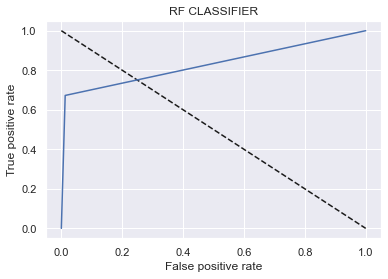

In [32]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [33]:
import eli5
eli5.show_weights(RF,vec = tf_vec, top = 15) 

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
test_data =tf_vec.fit_transform(test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [35]:
prediction=RF.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
import joblib
joblib.dump(RF,"malig.pkl")

['malig.pkl']